In [40]:
# Dependencies
import time
import json
import requests
from scipy.stats import linregress
from matplotlib import pyplot as plt
from scipy.stats import stats
from sklearn import datasets
import pandas as pd
import numpy as np
from csv import writer
from csv import reader

%matplotlib inline

In [107]:
# read from Daniel Jackson's csv
csv = pd.read_csv("../Daniel Jackson's Work/Stock_outputs.csv")
df = pd.DataFrame(csv)
df.head()

# convert NaN to zero values
df = df.fillna(0)
df.replace(np.nan,0)

# map formatting
# df["Revenue($mm)"] = df["Revenue($mm)"].map("${:,.2f}".format)
# df["EBIT($mm)"] = df["EBIT($mm)"].map("${:,.2f}".format)
# df["Debt($mm)"] = df["Debt($mm)"].map("${:,.2f}".format)
# df["Dividend Payout($mm)"] = df["Dividend Payout($mm)"].map("${:,.2f}".format)
# df["Operating Margin (%)"] = df["Operating Margin (%)"].map("{:,.2f} %".format)
# df["Payout (% of EBIT)"] = df["Payout (% of EBIT)"].map("{:,.2f} %".format)

df.head()

,Unnamed: 0,Symbol,Name,Exchange,Quarter,Revenue($mm),EBIT($mm),Debt($mm),Dividend Payout($mm),Operating Margin (%),Leverage (Debt/EBIT),Payout (% of EBIT)
0,0,APA,Apache Corp,S&P500,2020-06-30,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1,1,BKR,Baker Hughes,S&P500,2020-06-30,4736.0,32.0,6766.0,-118.0,0.68,52.86,368.75
2,2,COG,Cabot Oil & Gas Corp,S&P500,2020-06-30,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,3,COP,Conocophillips,S&P500,2020-06-30,2749.0,1381.0,14852.0,-455.0,50.24,2.69,32.95
4,4,CVX,Chevron Corp,S&P500,2020-06-30,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [108]:
div = df["Dividend Payout($mm)"]
div.dropna()

variance = np.var(div)
print(f"The variance using the NumPy module is {variance}")

sd_numpy = np.std(div,ddof = 0)
print(f"The standard deviation using the NumPy module is {sd_numpy}")

mean_numpy = np.mean(div)

print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

The variance using the NumPy module is 402018.92197826435
The standard deviation using the NumPy module is 634.0496210694115
Roughly 68% of the data is between -875.782 and 392.317
Roughly 95% of the data is between -1509.832 and 1026.367
Roughly 99.7% of the data is between -2143.881 and 1660.416


TypeError: 0 is not a string

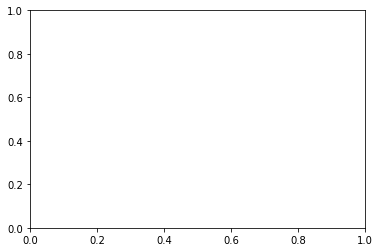

In [113]:


# filter_data = df.loc[df['Symbol'] == 'APA', :]
# filter_df = pd.DataFrame(filter_data)
# filter_df


x_values = df['Quarter']
y_values = df['Dividend Payout($mm)']
plt.scatter(x_values, y_values)

